In [5]:
from keras.applications import vgg16

In [6]:
conv_base = vgg16.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
from keras import models
from keras import layers

In [9]:
model = models.Sequential()

In [10]:
model.add(conv_base)

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
 print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [14]:
conv_base.trainable = False

In [15]:
 print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4


In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
from keras import optimizers

In [19]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range = 40,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
fill_mode = 'nearest')

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
import os

In [24]:
base_dir = r'C:\Users\ahsaa\Desktop\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [25]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [26]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [28]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [32]:
history = model.fit(
train_generator,
steps_per_epoch = 100,
epochs=30,
validation_data = validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 30s 215ms/step - loss: 0.6027 - acc: 0.6635 - val_loss: 0.4696 - val_acc: 0.8090
Epoch 2/30
100/100 [==============================] - 10s 103ms/step - loss: 0.4929 - acc: 0.7730 - val_loss: 0.3710 - val_acc: 0.8480
Epoch 3/30
100/100 [==============================] - 10s 102ms/step - loss: 0.4316 - acc: 0.8010 - val_loss: 0.3355 - val_acc: 0.8600
Epoch 4/30
100/100 [==============================] - 10s 103ms/step - loss: 0.3960 - acc: 0.8270 - val_loss: 0.3112 - val_acc: 0.8690
Epoch 5/30
100/100 [==============================] - 10s 104ms/step - loss: 0.3824 - acc: 0.8400 - val_loss: 0.2901 - val_acc: 0.8760
Epoch 6/30
100/100 [==============================] - 10s 105ms/step - loss: 0.3767 - acc: 0.8365 - val_loss: 0.2851 - val_acc: 0.8780
Epoch 7/30
100/100 [==============================] - 11s 105ms/step - loss: 0.3619 - acc: 0.8460 - val_loss: 0.2682 - val_acc: 0.8880
Epoch 8/30
100/100 [==============================] - 1

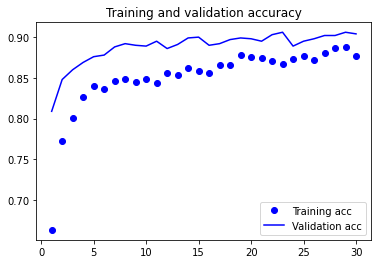

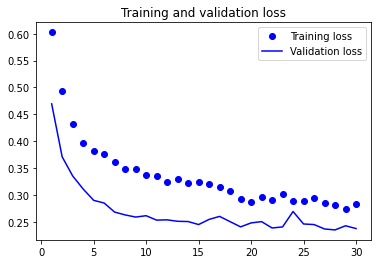

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()